<a href="https://colab.research.google.com/github/Yuexiaisnothere/Number-recognition/blob/main/Writing_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install tensorflow keras numpy mnist matplotlib

In [ ]:
import numpy as np
import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import keras
import keras.utils
from keras import utils as np_utils

In [ ]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [ ]:
train_images = (train_images/255)-0.5
test_images = (test_images/255)-0.5

train_images = train_images.reshape((-7,784))
test_images = test_images.reshape((-7,784))
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [ ]:
model=Sequential()
model.add(Dense(64,activation="relu",input_dim=784))
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Epoch 1/5
1875/1875 [==============================] - 10s 3ms/step - loss: 0.3557 - accuracy: 0.8945
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1750 - accuracy: 0.9456
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1378 - accuracy: 0.9569
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1132 - accuracy: 0.9647
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0994 - accuracy: 0.9690
dict_keys(['loss', 'accuracy'])


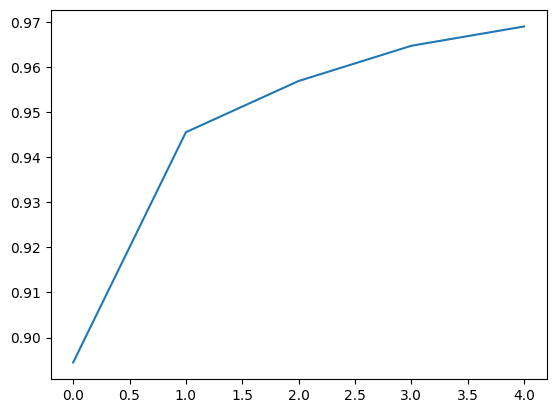

In [ ]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
from tensorflow.keras.utils import to_categorical
history=model.fit(train_images,to_categorical(train_labels),batch_size=32,epochs=5)
print(history.history.keys())
#print(plt.plot(history.history,["loss"]))
print(plt.plot(history.history["accuracy"]))

In [ ]:
model.evaluate(
    test_images,to_categorical(test_labels)
)

313/313 [==============================] - 1s 3ms/step - loss: 0.1082 - accuracy: 0.9664


[0.1082320436835289, 0.9664000272750854]

In [ ]:
predictions=model.predict(test_images[:5])
print(np.argmax(predictions,axis=1))
print(test_labels[:5])

1/1 [==============================] - 0s 71ms/step
[7 2 1 0 4]
[7 2 1 0 4]


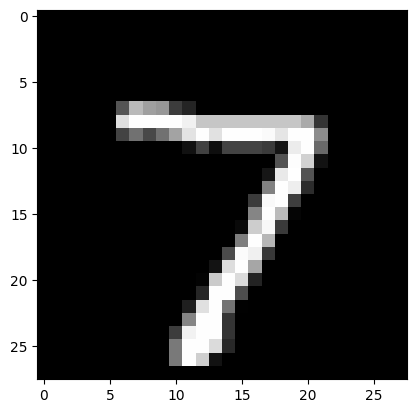

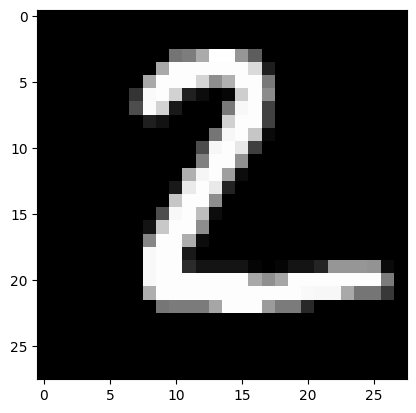

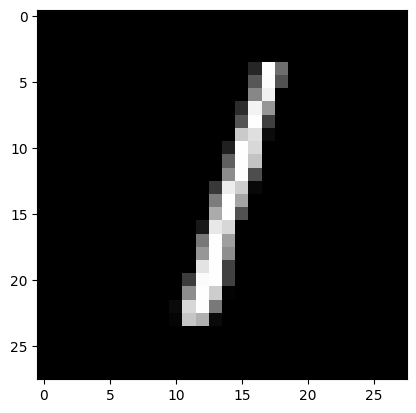

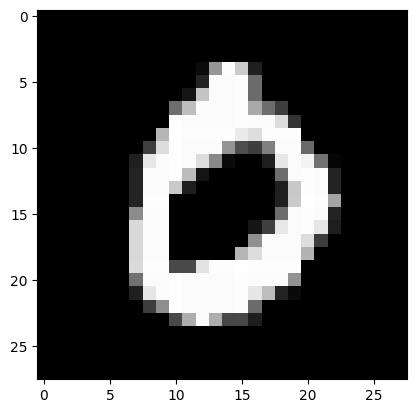

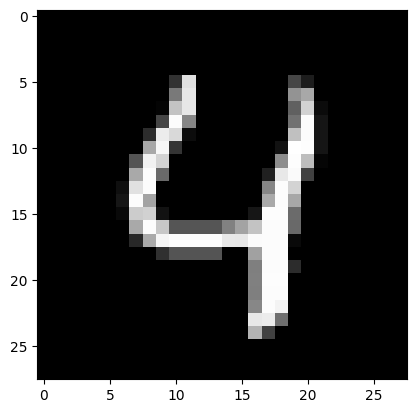

In [ ]:
for i in range(0,5):
  first_image=test_images[i]
  first_image=np.array(first_image,dtype="float")
  pixels=first_image.reshape((28,28))
  plt.imshow(pixels,cmap="gray")
  plt.show()

In [ ]:
import os
from google.colab import drive
drive.mount("/content/drive")
path=""C:/Users\user/Downloads/drive-download/test-1.jpg""#要更換成放data_for_test資料夾的位置
os.chdir(path)
os.listdir(path)

SyntaxError: ignored

In [ ]:
from PIL import Image
import numpy as np
import os

In [ ]:
img=Image.open("test-1.jpg").convert("1")#test-1 has other sample, like test-2... to test-5
img=np.resize(img,(28,28,1))
im2arr=np.array(img)
im2arr=im2arr.reshape(1,784)
y_pred=model.predict(im2arr)
print(np.argmax(y_pred,axis=1))

1/1 [==============================] - 0s 83ms/step
[3]
